In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
cd'/gdrive/My Drive/Colab Notebooks/Knight ML Assignment/Data'

/gdrive/My Drive/Colab Notebooks/Knight ML Assignment/Data


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df=pd.read_csv('train.csv')

In [5]:
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [7]:
df.describe()

,points,price
count,82657.000000,77088.000000
mean,88.544564,36.922232
std,3.099649,43.698346
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


In [13]:
df.isnull().sum()

user_name             19393
country                   0
review_title              0
review_description        0
designation           23642
points                    0
price                  5565
province                  0
region_1              12719
region_2              46673
winery                    0
variety                   0
dtype: int64

In [0]:
df.drop(df[df.country.isnull()].index,inplace=True)

In [0]:
country_variety = df.pivot_table(columns = 'variety',index='country',aggfunc='count',fill_value=0)['user_name']

In [60]:
country_variety.shape

(38, 28)

#No. of Reviews of different varities in different countries

From the second figure below we can show that:

1)Bordeaux-Style White blend is very famous in France.

2)Piot Nier is very famous in USA

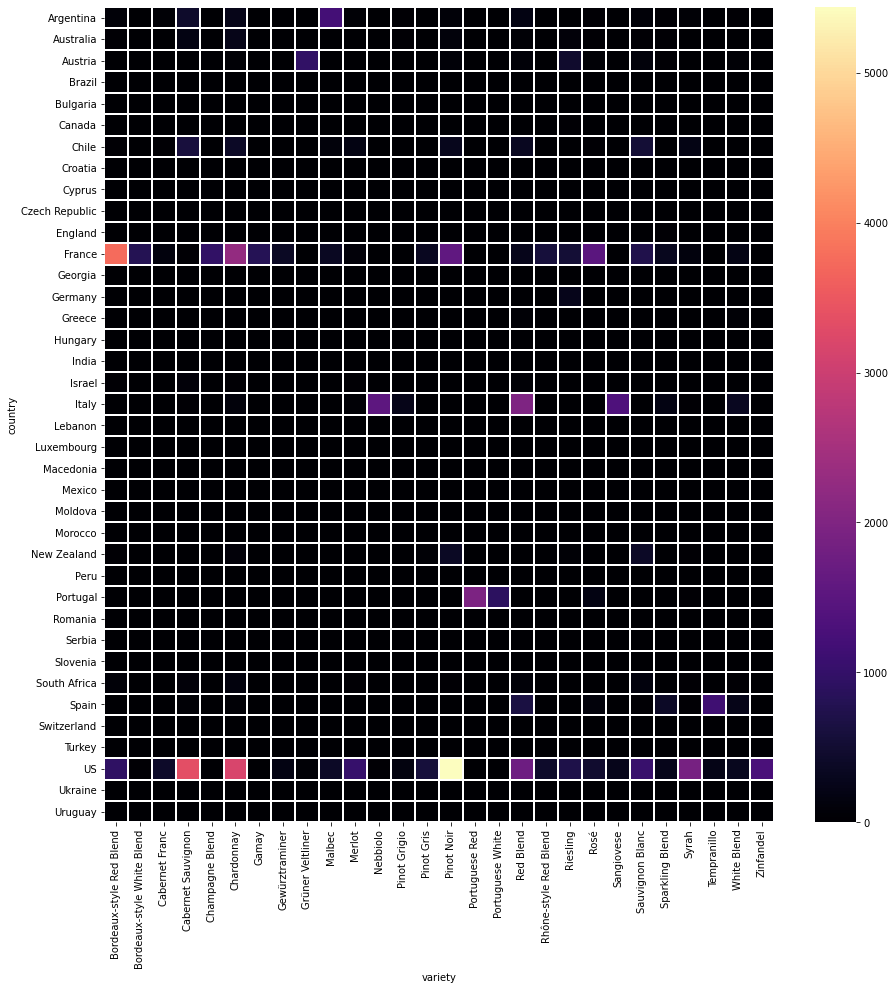

In [47]:
#since there are lot of countries with very less reviews, can are not able to get any insights from the below figure.
plt.figure(figsize=(15,15))
sns.heatmap(country_variety,linecolor='white',cmap='magma',linewidth=1)

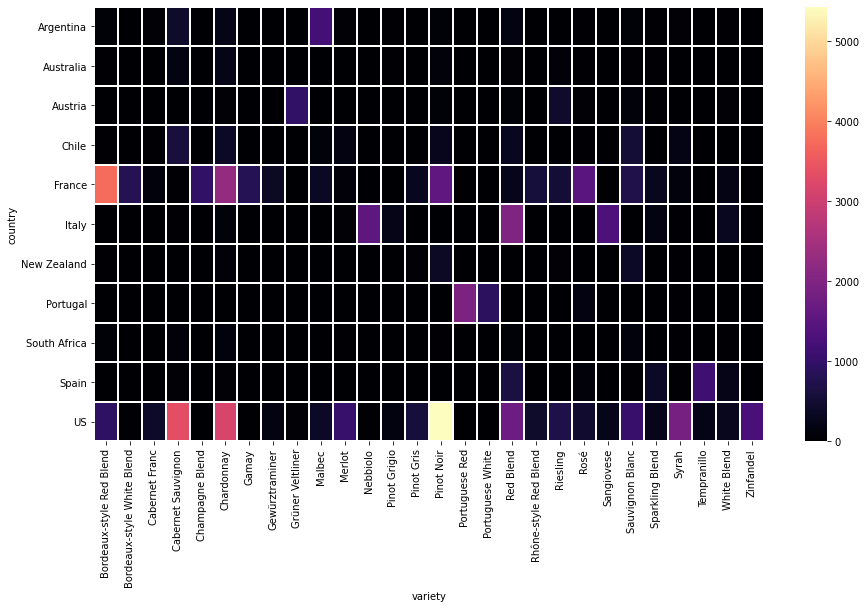

In [46]:
#Top 11 countries vs varities
country_variety.loc[country_variety.transpose().sum()>500]
plt.figure(figsize=(15,8))
sns.heatmap(country_variety.loc[country_variety.transpose().sum()>500],linecolor='white',cmap='magma',linewidth=1)

# Points Vs Price

We can see that higher the points higher is price of that particular variety.

But from the second figure below it is also clear that there are no. of outliers in the data that do not follow the above relationship/

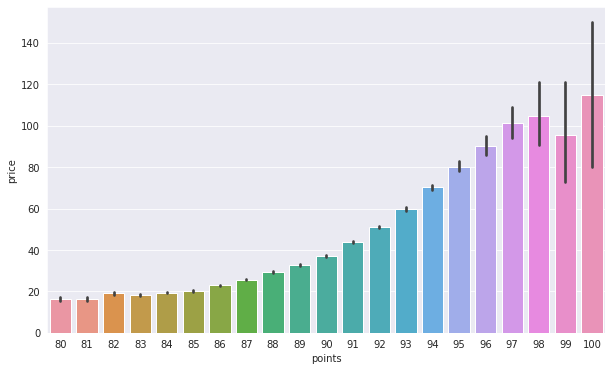

In [54]:
#price vs points relationship
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.barplot(x='points',y='price',data=df[df.price<200])

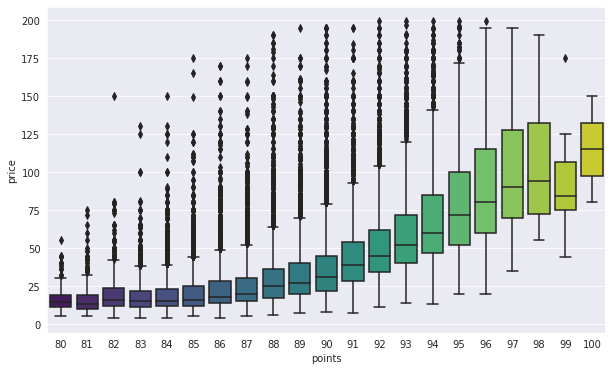

In [56]:
# A no. of outliers observed too.
plt.figure(figsize=(10,6))
sns.boxplot(x='points',y='price',data=df[df.price<200],palette='viridis')

#Mean Ratings given to different varities of wine.

It is clear that Nebbiolo is highest while Pinot grigio is the lowest rated wine variety, however the mean ratings are in the range 85-91 and do not differ much.

In [0]:
variety_points = df.groupby('variety')['points'].mean()

(80.0, 95.0)

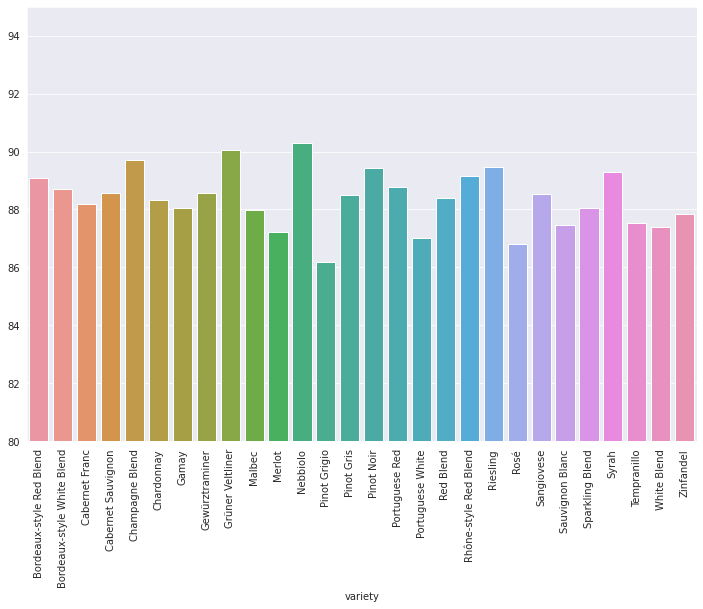

In [113]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(x=variety_points.index,y=variety_points.values)
plt.ylim((80,95))

#Mean Prices of different varities in different countries.

The below heat map shows that the most expensive drinks are Pinot Noir in Switzerland and Syrah in Australia


In [0]:
country_variety_price = df.pivot_table(columns = 'variety',index='country',aggfunc='mean',fill_value=0)['price']

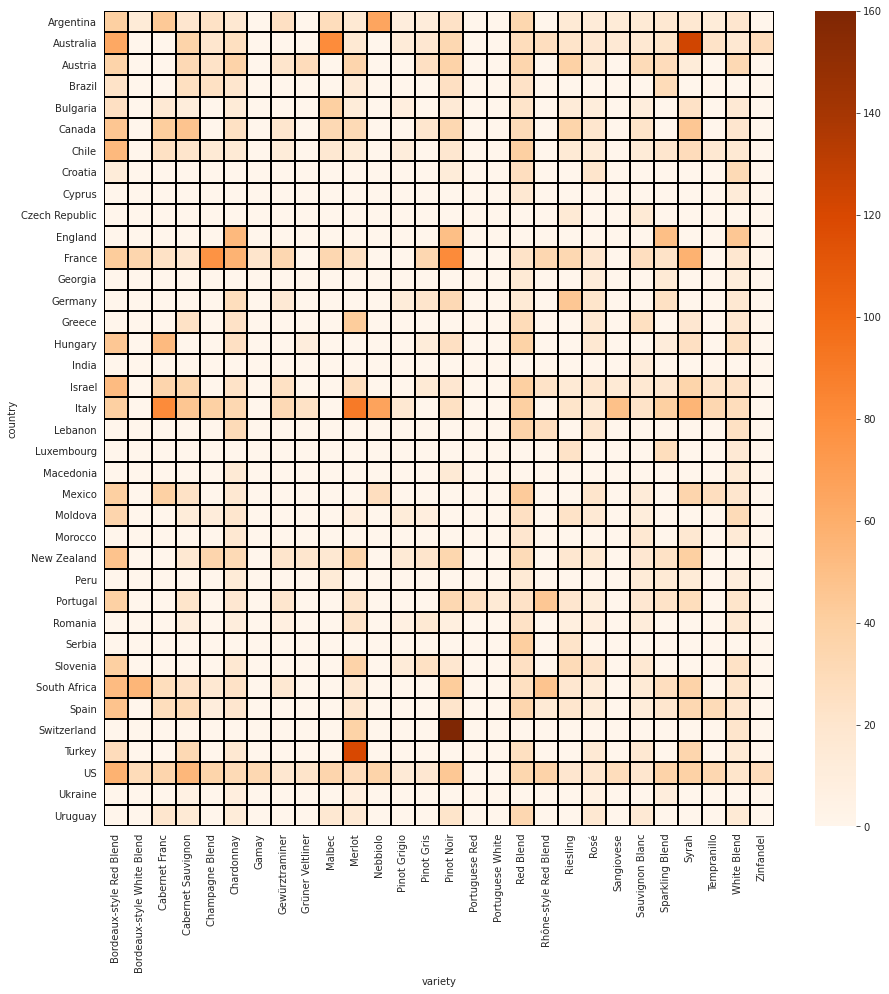

In [92]:
#Mean prices of different varieties of wine in different countries
plt.figure(figsize=(15,15))
sns.heatmap(country_variety_price,linecolor='black',cmap='Oranges',linewidth=1)

In [0]:
country_variety_price_na= df.pivot_table(columns = 'variety',index='country',aggfunc='mean')['price']

Nebbiolo has the highest mean price across the world,and it has most rating as observed earlier and again Pinot grigio is the cheapest one with lowest rating.

Text(0, 0.5, 'price in $')

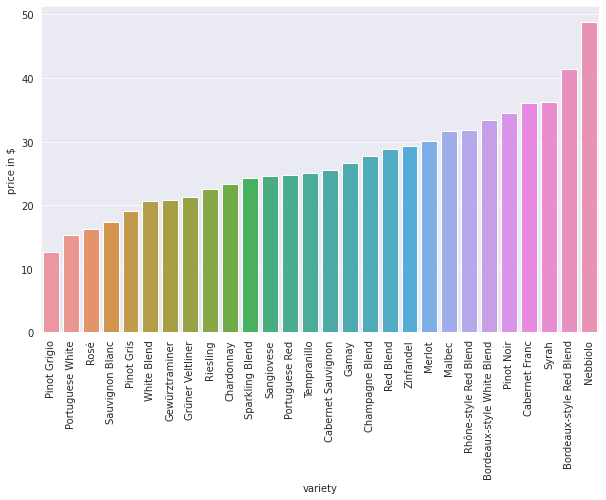

In [90]:
#mean prices of different varities of wine all over world
plt.figure(figsize=(10,6))
sns.barplot(country_variety_price_na.mean().sort_values().index,country_variety_price_na.mean().sort_values().values)
plt.xticks(rotation = 90)
plt.ylabel('price in $')

Switezerland has the most expensice wines and Ukraine has the cheapest wines according to the data.

Text(0, 0.5, 'price in $')

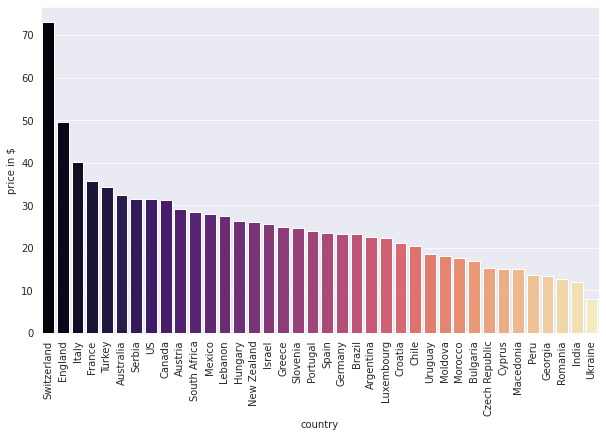

In [98]:
#mean prices of  of wine in different countries
plt.figure(figsize=(10,6))
sns.barplot(country_variety_price_na.transpose().mean().sort_values(ascending=False).index,country_variety_price_na.transpose().mean().sort_values(ascending=False).values,palette='magma')
plt.xticks(rotation = 90)
plt.ylabel('price in $')

#Text Data Insights 

Below cell shows the most common words in the review description of the given data. We can notice that it contains the name of the variety of the grape.

Refer this for my source code -
https://colab.research.google.com/drive/17gBn-ccPtpDkcpC-iw6d4180QYP-Bshl?authuser=3

In [0]:
#from sklearn.feature_selection import chi2
#import numpy as np
#N = 2
#for variety, category_id in sorted(category_to_id.items()):
#  features_chi2 = chi2(features, labels == category_id)
#  indices = np.argsort(features_chi2[0])
#  feature_names = np.array(tfidf.get_feature_names())[indices]
#  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
#  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
#  print("# '{}':".format(variety))
#  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
#  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))


# 'Bordeaux-style Red Blend':
  . Most correlated unigrams:
. bordeaux
. sample
  . Most correlated bigrams:
. black currant
. barrel sample
# 'Bordeaux-style White Blend':
  . Most correlated unigrams:
. sémillon
. botrytis
  . Most correlated bigrams:
. sémillon sauvignon
. sémillon blend
# 'Cabernet Franc':
  . Most correlated unigrams:
. cab
. franc
  . Most correlated bigrams:
. franc palate
. cab franc
# 'Cabernet Sauvignon':
  . Most correlated unigrams:
. cassis
. cab
  . Most correlated bigrams:
. flavors blackberries
. 100 cabernet
# 'Champagne Blend':
  . Most correlated unigrams:
. dosage
. champagne
  . Most correlated bigrams:
. high dosage
. dry champagne
# 'Chardonnay':
  . Most correlated unigrams:
. buttered
. chardonnay
  . Most correlated bigrams:
. tropical fruit
. buttered toast
# 'Gamay':
  . Most correlated unigrams:
. nouveau
. beaujolais
  . Most correlated bigrams:
. cherry fruits
. cru wine
# 'Gewürztraminer':
  . Most correlated unigrams:
. lychee
. gewürzt

Most common words in review description after removing names of the varities. 

Refer this for my source code - 
https://colab.research.google.com/drive/1d9b2NraBJRucDgrLNuCctVb_rMc9f9nA?authuser=3#scrollTo=at3_1FFdgtF_

In [0]:
#from sklearn.feature_selection import chi2
#import numpy as np
#N = 2
#for variety, category_id in sorted(category_to_id.items()):
# features_chi2 = chi2(features, labels == category_id)
# indices = np.argsort(features_chi2[0])
#  feature_names = np.array(tfidf.get_feature_names())[indices]
#  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
#  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
#  print("# '{}':".format(variety))
#  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
#  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Bordeaux-style Red Blend':
  . Most correlated unigrams:
. bordeaux
. sample
  . Most correlated bigrams:
. black currant
. barrel sample
# 'Bordeaux-style White Blend':
  . Most correlated unigrams:
. sémillon
. botrytis
  . Most correlated bigrams:
. barrel sample
. herbaceous character
# 'Cabernet Franc':
  . Most correlated unigrams:
. francs
. cab
  . Most correlated bigrams:
. flowers cherry
. cranberry acidity
# 'Cabernet Sauvignon':
  . Most correlated unigrams:
. cassis
. cab
  . Most correlated bigrams:
. blackberry cherry
. flavors blackberries
# 'Champagne Blend':
  . Most correlated unigrams:
. nonvintage
. dosage
  . Most correlated bigrams:
. nonvintage cuvée
. high dosage
# 'Chardonnay':
  . Most correlated unigrams:
. pineapple
. buttered
  . Most correlated bigrams:
. tropical fruit
. buttered toast
# 'Gamay':
  . Most correlated unigrams:
. nouveau
. beaujolais
  . Most correlated bigrams:
. cherry fruits
. cru wine
# 'Gewürztraminer':
  . Most correlated unigrams